In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
df = pd.read_csv('census-income.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df = df.rename(columns={'Unnamed: 14': 'Annual-income'})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Annual-income     0
dtype: int64

In [10]:
df.apply(lambda x: x.unique())

age               [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...
workclass         [State-gov, Self-emp-not-inc, Private, Federal...
fnlwgt            [77516, 83311, 215646, 234721, 338409, 284582,...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
education-num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
marital-status    [Never-married, Married-civ-spouse, Divorced, ...
occupation        [Adm-clerical, Exec-managerial, Handlers-clean...
relationship      [Not-in-family, Husband, Wife, Own-child, Unma...
race              [White, Black, Asian-Pac-Islander, Amer-Indian...
sex                                                  [Male, Female]
capital-gain      [2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...
capital-loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
hours-per-week    [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
native-country    [United-States, Cuba, Jamaica, India, ?, Mexic...
Annual-income                                   

# DATA MANIPULATION

In [11]:
df[(df['workclass']=='Private') & (df['native-country']!='United-States')].shape

(2554, 15)

In [12]:
# Extracting the “education” column and storing it in “census_ed
census_ed=df['education']
census_ed.head(5)

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [13]:
# Extracting all the columns from “age” to “relationship” and storoing it in “census_seq”
census_seq=df.iloc[:,:8]
census_seq.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [14]:
# Extracting the column number “5”, “8”, “11” and storing it in “census_col”.
census_col=df.iloc[:,[5,8,11]]
census_col.head(5)

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0


In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Extracting all the male employees who work in state-gov and storing it in “male_gov”.
male_gov=df[(df['sex']=='Male') & (df['workclass']=='State-gov')]
male_gov.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [17]:
# Extracting all the 39 year olds who have bachelor's degree or who are native of US and storing the result in “census_us”.
census_us=df[(df['age']==39)& ((df['education']=='Bachelors') |(df['native-country']=='United-States'))]
census_us.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [18]:
# Extracting 200 random rows from the “census” data frame and storing it in “census_200”.
census_200=df.sample(200)
census_200.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-income
7911,38,Self-emp-not-inc,127961,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,>50K
20156,18,Private,271935,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
24030,47,Private,216096,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,35,Puerto-Rico,<=50K
21261,45,Private,148171,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,40,United-States,>50K
22725,23,Private,216811,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,16,United-States,<=50K


In [19]:
# Get the count of different levels of the “workclass” column
df['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
# Calculate the mean of the “capital.gain” column grouped according to “workclass”.
df.groupby('workclass')['capital-gain'].mean()

workclass
?                    606.795752
Federal-gov          833.232292
Local-gov            880.202580
Never-worked           0.000000
Private              890.119834
Self-emp-inc        4875.693548
Self-emp-not-inc    1886.804331
State-gov            701.699538
Without-pay          487.857143
Name: capital-gain, dtype: float64

In [21]:
# Create a separate dataframe with the details of males and females from the census data that has income more than 50,000.
high_income_df = df[df['Annual-income'] == '>50K']  # Filtering data for income more than 50,000
males_df = high_income_df[high_income_df['sex'] == 'Male']  # Filtering data for males
females_df = high_income_df[high_income_df['sex'] == 'Female']  # Filtering data for females

# Print the separate dataframes
print("i) Separate DataFrame for Males with Income >50K:")
print(males_df.head(5))

i) Separate DataFrame for Males with Income >50K:
    age         workclass  fnlwgt     education  education-num  \
7    52  Self-emp-not-inc  209642       HS-grad              9   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
14   40           Private  121772     Assoc-voc             11   

        marital-status       occupation relationship                race  \
7   Married-civ-spouse  Exec-managerial      Husband               White   
9   Married-civ-spouse  Exec-managerial      Husband               White   
10  Married-civ-spouse  Exec-managerial      Husband               Black   
11  Married-civ-spouse   Prof-specialty      Husband  Asian-Pac-Islander   
14  Married-civ-spouse     Craft-repair      Husband  Asian-Pac-Islander   

     sex  capital-gain  capital-loss  hours-per-week native-country  \
7   Male             0   

In [22]:
print("\nSeparate DataFrame for Females with Income >50K:")
print(females_df.head(5))


Separate DataFrame for Females with Income >50K:
    age         workclass  fnlwgt    education  education-num  \
8    31           Private   45781      Masters             14   
19   43  Self-emp-not-inc  292175      Masters             14   
52   47           Private   51835  Prof-school             15   
67   53           Private  169846      HS-grad              9   
84   44           Private  343591      HS-grad              9   

        marital-status       occupation   relationship   race     sex  \
8        Never-married   Prof-specialty  Not-in-family  White  Female   
19            Divorced  Exec-managerial      Unmarried  White  Female   
52  Married-civ-spouse   Prof-specialty           Wife  White  Female   
67  Married-civ-spouse     Adm-clerical           Wife  White  Female   
84            Divorced     Craft-repair  Not-in-family  White  Female   

    capital-gain  capital-loss  hours-per-week native-country Annual-income  
8          14084             0            

In [23]:
# Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually.
us_priv_less50k = df[(df['native-country'] == 'United-States') & (df['workclass'] == 'Private') & (df['Annual-income'] == '<=50K')]
per_us_priv_less50k = (len(us_priv_less50k) / len(df[df['native-country'] == 'United-States'])) * 100

# Print the result
print("\nj) Percentage of people from the United States who are private employees and earn less than 50,000 annually:")
print(per_us_priv_less50k)


j) Percentage of people from the United States who are private employees and earn less than 50,000 annually:
53.442184337804


In [24]:
# Calculate the percentage of married people in the census data.
married_percentage = (len(df[df['marital-status'].str.startswith('Married')]) / len(df)) * 100

# Print the result
print("\nk) Percentage of married people in the census data:")
print(married_percentage)


k) Percentage of married people in the census data:
47.36453883271353


In [25]:
# Calculate the percentage of high school graduates earning more than 50,000 annually.
hs_graduates_more50k = df[(df['education'] == 'HS-grad') & (df['Annual-income'] == '>50K')]
per_hs_graduates_more50k = (len(hs_graduates_more50k) / len(df[df['education'] == 'HS-grad'])) * 100

# Print the result
print("\nl) Percentage of high school graduates earning more than 50,000 annually:")
print(per_hs_graduates_more50k)



l) Percentage of high school graduates earning more than 50,000 annually:
15.951972555746142


# DATA VISUALIZATION

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


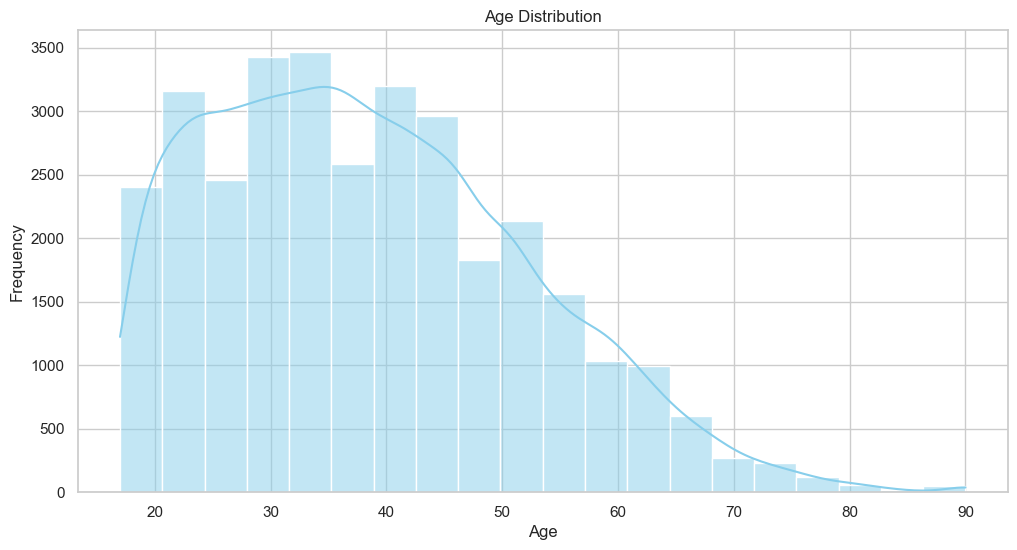

The histogram shows the distribution of ages in the dataset, providing insights into the age demographics.


In [26]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("The histogram shows the distribution of ages in the dataset, providing insights into the age demographics.")


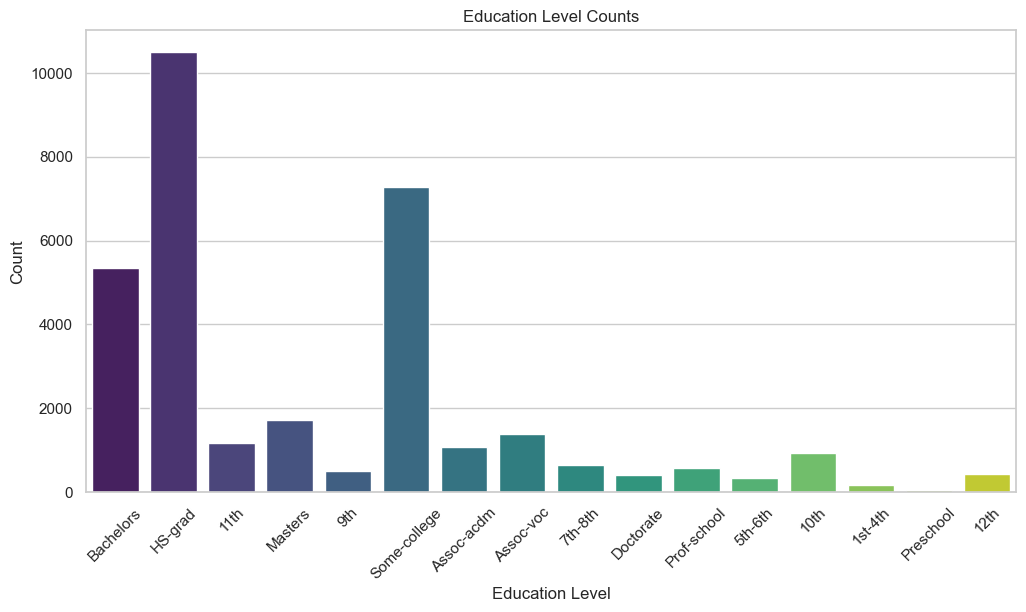

This countplot displays the distribution of education levels, helping to understand the educationbackground of individuals.


In [27]:
# Education Level Counts
plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=df, palette='viridis')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("This countplot displays the distribution of education levels, helping to understand the education" 
      "background of individuals.")

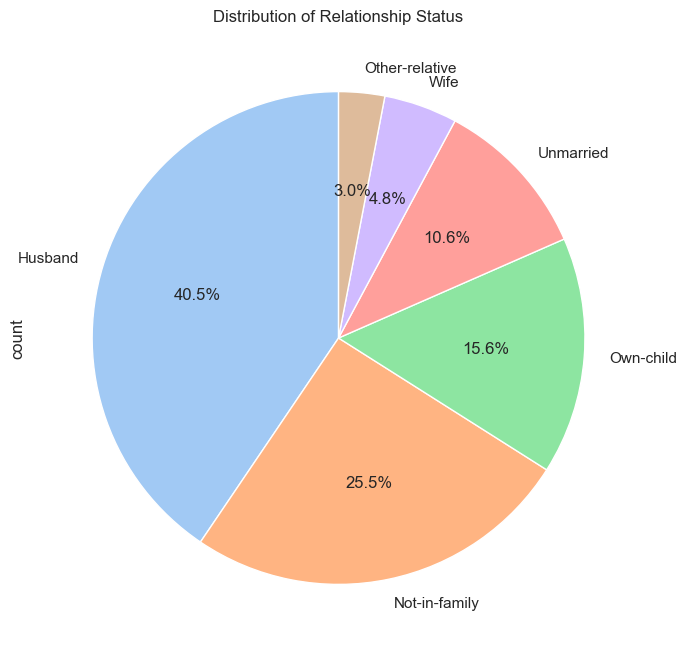

The pie chart illustrates the distribution of relationship statuses,providing a visual representation of the proportions.


In [28]:
# Relationship Status Pie Chart
plt.figure(figsize=(8, 8))
df['relationship'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Relationship Status')
plt.show()
print("The pie chart illustrates the distribution of relationship statuses," 
      "providing a visual representation of the proportions.")

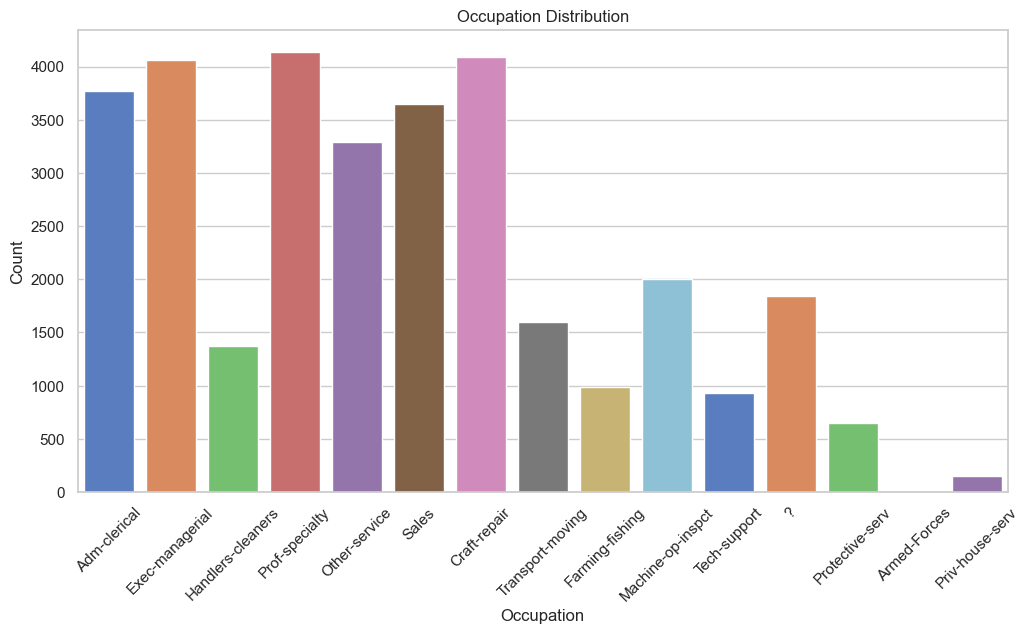

This bar chart shows the distribution of different occupations, offering insights into thediversity of occupations in the dataset.


In [29]:
# Occupation Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=df, palette='muted')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("This bar chart shows the distribution of different occupations, offering insights into the" 
      "diversity of occupations in the dataset.")

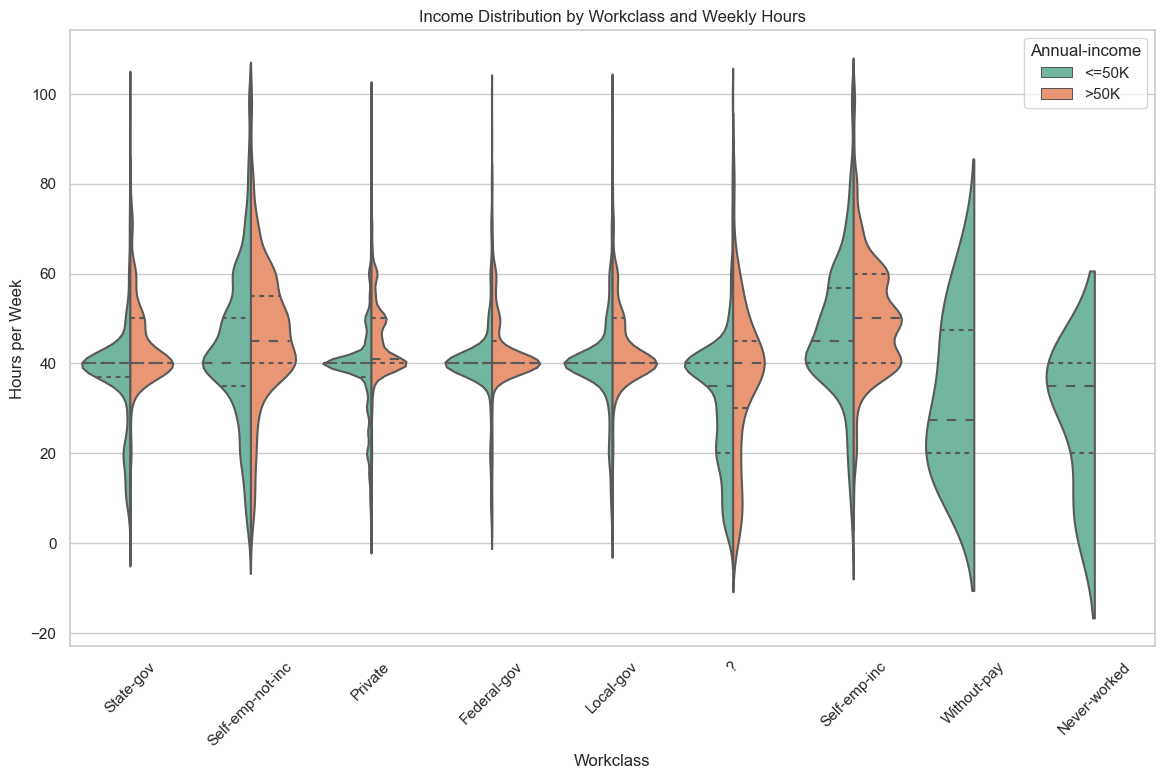

The violin plot visualizes the distribution of weekly working hours for different workclasses,segmented by income levels. It helps identify patterns and variations in the data.


In [30]:
# Income Distribution by Workclass
plt.figure(figsize=(14, 8))
sns.violinplot(x='workclass', y='hours-per-week', hue='Annual-income', data=df, split=True, inner='quart', palette='Set2')
plt.title('Income Distribution by Workclass and Weekly Hours')
plt.xlabel('Workclass')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()
print("The violin plot visualizes the distribution of weekly working hours for different workclasses," 
      "segmented by income levels. It helps identify patterns and variations in the data.")

# DATA PREPROCESSING

In [31]:
value_to_count = '?' 
df.isin([value_to_count]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
Annual-income     False
dtype: bool

In [32]:
count_of_question_marks = (df == value_to_count).sum().sum()
count_of_question_marks

4261

In [33]:
# Replace '?' with 'unknown'
df.replace(value_to_count, 'unknown', inplace=True)
df.apply(lambda x: x.unique())

age               [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...
workclass         [State-gov, Self-emp-not-inc, Private, Federal...
fnlwgt            [77516, 83311, 215646, 234721, 338409, 284582,...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
education-num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
marital-status    [Never-married, Married-civ-spouse, Divorced, ...
occupation        [Adm-clerical, Exec-managerial, Handlers-clean...
relationship      [Not-in-family, Husband, Wife, Own-child, Unma...
race              [White, Black, Asian-Pac-Islander, Amer-Indian...
sex                                                  [Male, Female]
capital-gain      [2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...
capital-loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
hours-per-week    [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
native-country    [United-States, Cuba, Jamaica, India, unknown,...
Annual-income                                   

Encoding categorical data (independent variables)

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['education'] = labelencoder.fit_transform(df['education'])
df['marital-status'] = labelencoder.fit_transform(df['marital-status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['race'] = labelencoder.fit_transform(df['race'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native-country'] = labelencoder.fit_transform(df['native-country'])

Encoding categorical data (dependent variables)

In [35]:
df['Annual-income'] = labelencoder.fit_transform(df['Annual-income'])

# MACHINE LEARNING MODELS

Linear Regression

In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Taking 'education.num' as the independent variable and 'hours-per-week' as the dependent variable
X = df[['education-num']]
y = df['hours-per-week']

In [37]:
# Dividing the dataset into training and test sets in a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shapes of training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (22775, 1)
X_test shape: (9762, 1)


In [38]:
# Train a simple linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict values on the training set
y_train_pred = linear_reg.predict(X_train)

# Calculate the error in prediction
error_train = y_train - y_train_pred

# Display the first few rows of actual values, predicted values, and errors
prediction_results_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Error': error_train})
print(prediction_results_train.head())


       Actual  Predicted     Error
1216       40  40.346433 -0.346433
27958      40  42.499166 -2.499166
23078      50  44.651900  5.348100
19679      45  39.628855  5.371145
19181      45  39.628855  5.371145


In [40]:
# Predict values on the test set
y_test_pred = linear_reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 12.232012164528925


# Logistic Regression

 Simple Logistic Regression

In [41]:
# Divide the dataset into training and test sets in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(df['occupation'], df['Annual-income'], test_size=0.35, random_state=42)

In [42]:
# Build a logistic regression model
from sklearn.linear_model import LogisticRegression
logis_simple = LogisticRegression()
logis_simple.fit(X_train.values.reshape(-1, 1), y_train)

LogisticRegression()

In [43]:
# Predict values on the test set
y_pred = logis_simple.predict(X_test.values.reshape(-1, 1))

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8635
           1       0.00      0.00      0.00      2753

    accuracy                           0.76     11388
   macro avg       0.38      0.50      0.43     11388
weighted avg       0.57      0.76      0.65     11388


Confusion Matrix:
[[8635    0]
 [2753    0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SIMRAN BANSAL\AppData\Local\Temp\ipykernel_17348\2883098395.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')


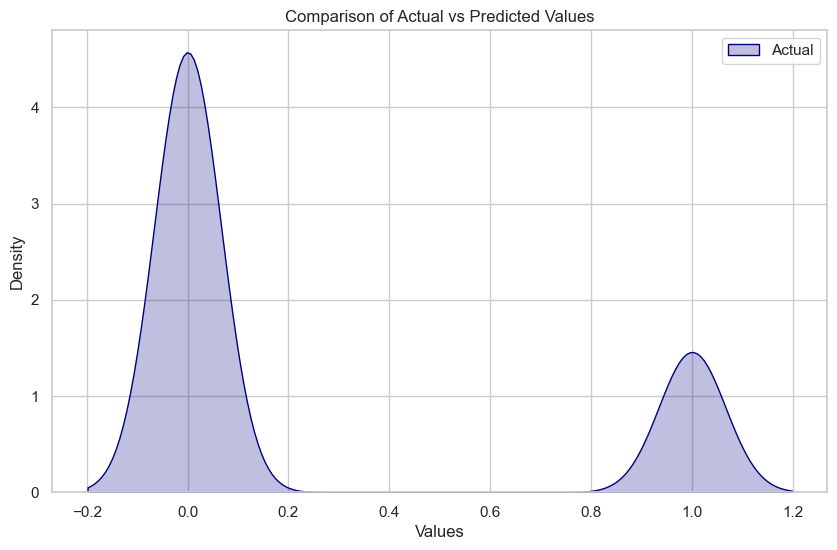

In [45]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Multiple Logistic Regression with few independent variables

In [46]:
# Divide the dataset into training and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'workclass', 'education']], df['Annual-income'], test_size=0.20, random_state=42)

In [47]:
# Build a logistic regression model with multiple independent variables
logis_multi = LogisticRegression()
logis_multi.fit(X_train, y_train)

# Predict values on the test set
y_pred = logis_multi.predict(X_test)

In [48]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      4905
           1       0.28      0.03      0.05      1603

    accuracy                           0.74      6508
   macro avg       0.52      0.50      0.45      6508
weighted avg       0.64      0.74      0.65      6508


Confusion Matrix:
[[4783  122]
 [1556   47]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


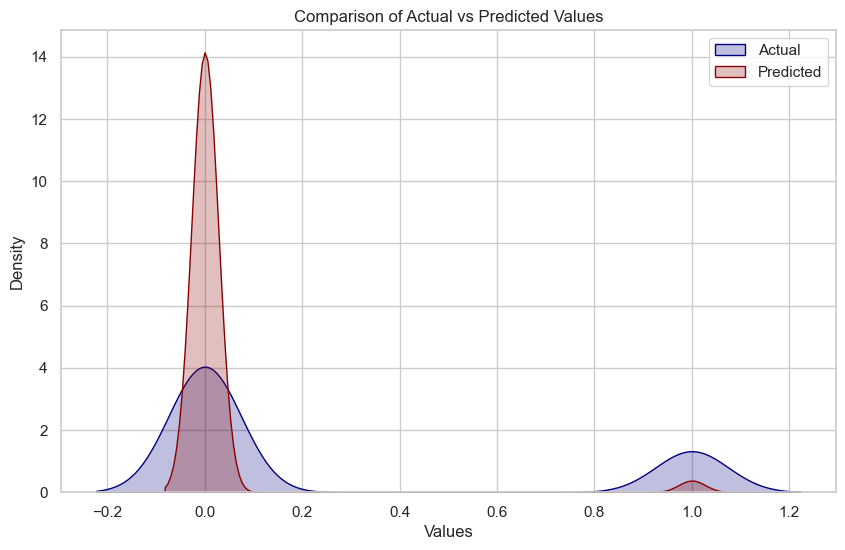

In [49]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

Multiple Logistic Regression with all the independent variables

In [50]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [51]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Annual-income, Length: 32537, dtype: int32

In [52]:
# SPLITTING THE DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize the Logistic Regression model & Train the model
logis = LogisticRegression(random_state=42)
logis.fit(X_train_scaled, y_train)
# Make predictions on the testing set
y_pred = logis.predict(X_test_scaled)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4905
           1       0.72      0.48      0.57      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.71      0.73      6508
weighted avg       0.81      0.83      0.81      6508


Confusion Matrix:
[[4603  302]
 [ 836  767]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


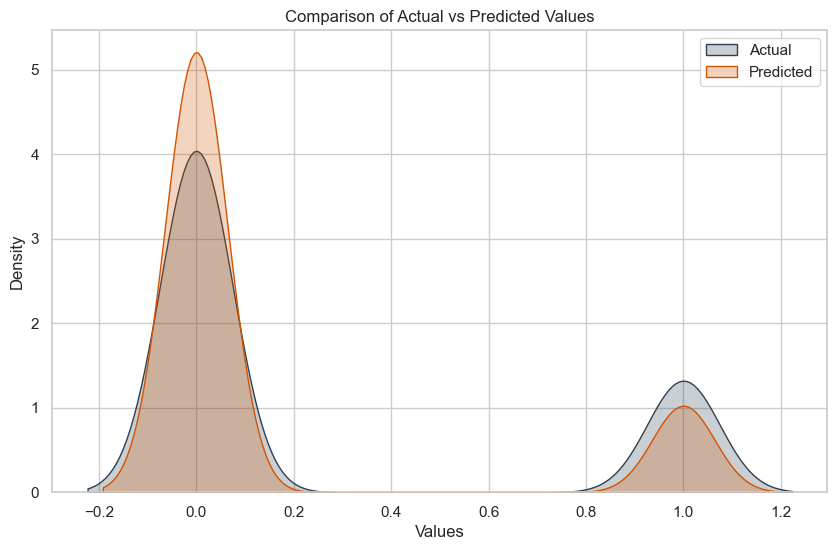

In [56]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='#2E4053')  # Dark blue
sns.kdeplot(y_pred, label='Predicted', fill=True, color='#D35400')  # Dark orange
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Decision Tree Classifier

In [57]:
# Initialize the Random Forest model & Train the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Make predictions on the testing set
y_pred = dt.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4905
           1       0.61      0.64      0.62      1603

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.75      6508
weighted avg       0.81      0.81      0.81      6508


Confusion Matrix:
[[4239  666]
 [ 576 1027]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


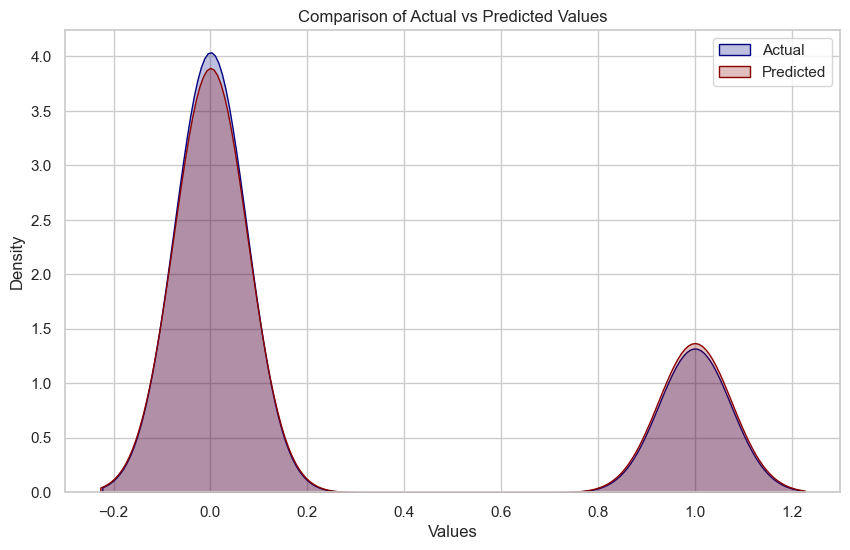

In [60]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Random Forest Classifier

In [61]:
# Initialize the Random Forest model & Train the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12,random_state=42)
rfc.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = rfc.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4905
           1       0.75      0.60      0.67      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.85      0.85      6508


Confusion Matrix:
[[4583  322]
 [ 637  966]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


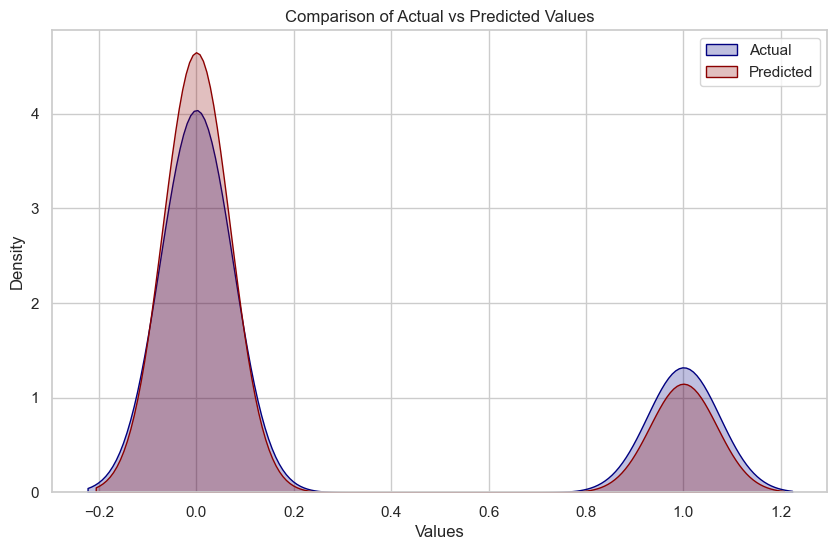

In [63]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Feature Importances

In [64]:
# Access feature importances
feature_importances = rfc.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

age: 0.16492061092846028
workclass: 0.040138492035410374
fnlwgt: 0.1663537916734323
education: 0.03291018769875601
education-num: 0.08547601152040345
marital-status: 0.05651497781004619
occupation: 0.06452381431032278
relationship: 0.09577383886625418
race: 0.014306618522887338
sex: 0.015497628912787406
capital-gain: 0.11880180625861309
capital-loss: 0.04252537096726571
hours-per-week: 0.08313822673587916
native-country: 0.019118623759481784


Random Forest Hyperparameter Tuning with GridSearchCV 

In [65]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on the test set: 0.8655500921942225


Random Forest Hyperparameter Tuning with RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Define the hyperparameters and their possible values to search
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [None] + list(range(10, 31)),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a ColumnTransformer for preprocessing (replace this with your specific preprocessing steps)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']),
        ('cat', 'passthrough', ['workclass', 'marital-status', 'occupation'])
    ])

# Create a Pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)

Best hyperparameters: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 156}
Accuracy on the test set: 0.8684695759065765


XGB Classifier

In [67]:
from xgboost import XGBClassifier
# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, objective='binary:logistic')

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4905
           1       0.77      0.67      0.72      1603

    accuracy                           0.87      6508
   macro avg       0.83      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508


Confusion Matrix:
[[4591  314]
 [ 531 1072]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


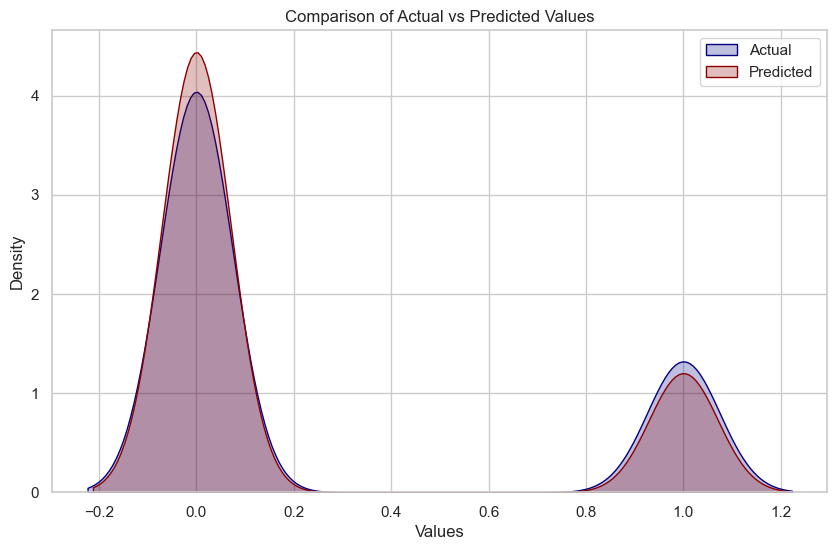

In [69]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


XGB Claasifier Hyperparameter Tuning with RandomizedSearchCV

In [70]:
# Define the hyperparameters and their possible values to search
param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__min_child_weight': [1, 2, 3, 4]
}

In [71]:
# Create a Pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, objective='binary:logistic'))
])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [72]:
# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)

Best hyperparameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 157, 'classifier__subsample': 0.9}
Accuracy on the test set: 0.8712354025814383


Support Vector Machine (SVM)

In [73]:
from sklearn.svm import SVC
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import randint

# Create an SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Create a full pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm_classifier)
])

# Train the SVM model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4905
           1       0.77      0.53      0.63      1603

    accuracy                           0.85      6508
   macro avg       0.82      0.74      0.77      6508
weighted avg       0.84      0.85      0.84      6508


Confusion Matrix:
[[4653  252]
 [ 753  850]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


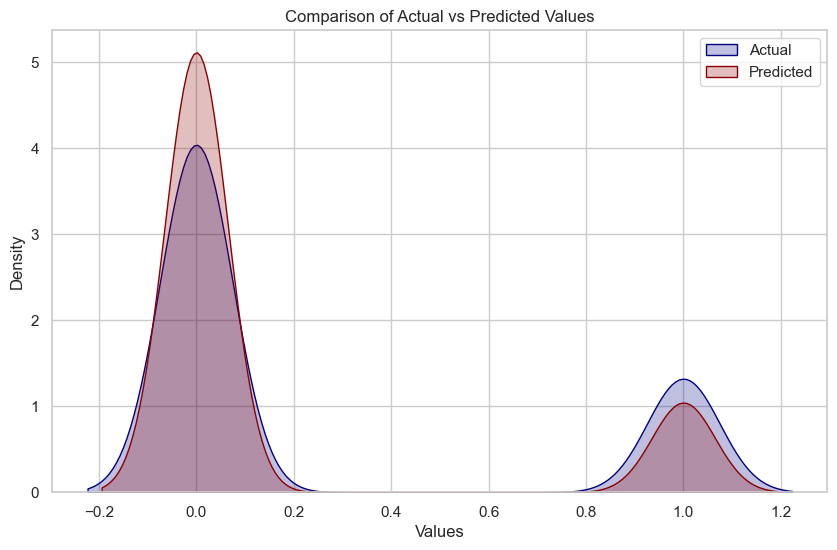

In [75]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate for actual and predicted values with dark colors
sns.kdeplot(y_test, label='Actual', fill=True, color='navy')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='darkred')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


# SELECTING THE BEST MODEL

In [76]:
# Initialize lists to store results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']
accuracies = []
conf_matrices = []
class_reports = []

# Function to evaluate model and store results
def evaluate_model(model_name, model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    accuracies.append(accuracy)
    conf_matrices.append(conf_matrix)
    class_reports.append(class_report)

# Evaluate each model
evaluate_model('Logistic Regression', logis, X_test_scaled, y_test)
evaluate_model('Decision Tree', dt, X_test, y_test)
evaluate_model('Random Forest', rfc, X_test, y_test)
evaluate_model('XGBoost', xgb_classifier, X_test, y_test)
evaluate_model('SVM', pipeline, X_test, y_test)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Confusion Matrix': conf_matrices,
    'Classification Report': class_reports
})

# Print the DataFrame
print(results_df)

                 Model  Accuracy            Confusion Matrix  \
0  Logistic Regression  0.825138   [[4603, 302], [836, 767]]   
1        Decision Tree  0.809158  [[4239, 666], [576, 1027]]   
2        Random Forest  0.852643   [[4583, 322], [637, 966]]   
3              XGBoost  0.870160  [[4591, 314], [531, 1072]]   
4                  SVM  0.845575   [[4653, 252], [753, 850]]   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  


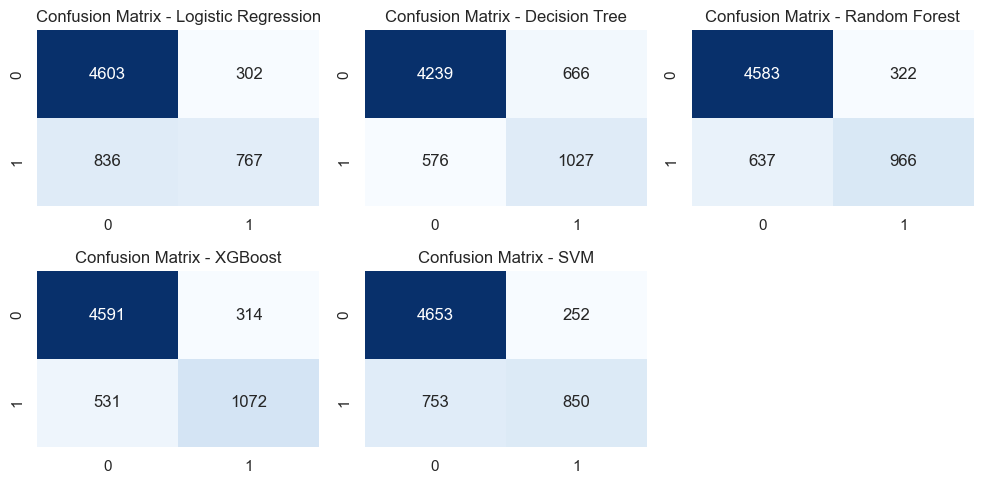

In [77]:
# Visualize confusion matrices using heatmaps
plt.figure(figsize=(10, 5))
for i, model_name in enumerate(models, start=1):
    plt.subplot(2, 3, i)
    sns.heatmap(conf_matrices[i-1], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

In [78]:
# Select the best model based on the highest accuracy
best_model_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
best_model_accuracy = results_df.loc[best_model_index, 'Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

The best model is XGBoost with an accuracy of 0.87
